**In this notebook:** 
    
    - I plot the age-stratified contact matrix
    - I plot the intermediate contact matrix (fully informed from the available data)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm
import math
import random

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

In [10]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# reciprocal age stratified contact matrix 

In [11]:
def truncate_colormap(cmap, minval=0., maxval=0.8, n=100):
    """Truncate a colormap to a given range."""
    new_cmap = LinearSegmentedColormap.from_list(
        f"truncated({cmap.name},{minval},{maxval})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

cmap = plt.cm.Blues
cmap= truncate_colormap(cmap)

In [12]:
matrix_rec = pd.read_csv("./../output/matrices/matrix_rec.csv", index_col = 0)

In [13]:
matrix_rec

,0-14,15-24,25-64,65+
age_part_4cat,,,,
0-14,5.542891,0.514395,3.383834,0.443207
15-24,0.761460,3.000000,3.669290,0.872285
25-64,0.915785,0.670835,3.739023,0.817096
65+,0.347758,0.462358,2.368968,1.467081


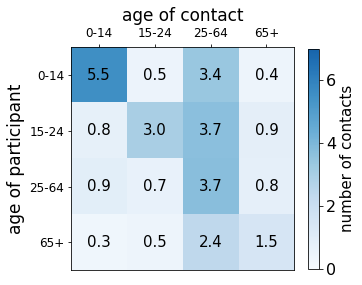

In [14]:
plt.figure(figsize=(5,5))


df_plot = matrix_rec.copy()

# Plot heatmap using Matplotlib
plt.imshow(df_plot, 
           cmap=cmap,
           interpolation='nearest',
           vmin=0, vmax = 7)
            #vmax=math.ceil(df_plot.max().max()))

# Add color bar
cbar = plt.colorbar(shrink=0.81)
cbar.set_label('number of contacts', fontsize=15)  # Increase label font size
cbar.ax.tick_params(labelsize=16)

# Set ticks
plt.xticks(range(len(df_plot.columns)), df_plot.columns, fontsize=12)
plt.tick_params(axis='x', which='both', 
                bottom=False, top=True, labelbottom=False, labeltop=True)
plt.yticks(range(len(df_plot.index)), df_plot.index, fontsize=12)

# Set labels and title
plt.ylabel('age of participant', fontsize=17)

plt.title('age of contact', fontsize=17)

# Add annotations
for i in range(len(df_plot.index)):
    for j in range(len(df_plot.columns)):
        plt.text(j, i, np.around(df_plot.values[i, j],1), 
                 ha='center', va='center', color='black', fontsize=15)

plt.savefig("./../output/figures/age_stratified_matrix.png", dpi = 200, bbox_inches="tight")

plt.show()

# intermediate contact matrix

In [15]:
intermediate_matrix_rec = pd.read_csv("./../output/matrices/intermediate_matrix_rec.csv", index_col = 0)
intermediate_matrix_rec_na = intermediate_matrix_rec.copy()

intermediate_matrix_rec = intermediate_matrix_rec.fillna(0)

In [16]:
intermediate_matrix_rec

,0-14,15-24,25-64,65+
tag_index,,,,
"0-14, low SEP, low edu",5.565127,0.518313,3.383215,0.485089
"0-14, low SEP, high edu",0.000000,0.000000,0.000000,0.000000
"0-14, high SEP, low edu",5.532796,0.512616,3.384115,0.424194
"0-14, high SEP, high edu",0.000000,0.000000,0.000000,0.000000
"15-24, low SEP, low edu",0.923322,3.462194,3.906265,0.967767
"15-24, low SEP, high edu",1.324694,4.332172,6.893188,2.946244
"15-24, high SEP, low edu",0.708418,2.784684,3.386128,0.703637
"15-24, high SEP, high edu",0.230279,2.296604,3.934065,1.189580
"25-64, low SEP, low edu",0.900639,0.639412,3.568599,0.853838


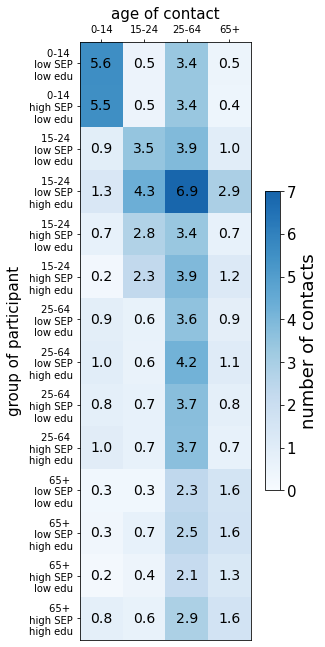

In [17]:
plt.figure(figsize=(5,11))

df_plot = intermediate_matrix_rec_na.copy()

df_plot = df_plot.dropna()

# Plot heatmap using Matplotlib
plt.imshow(df_plot, 
           cmap=cmap,
           interpolation='nearest', 
           vmin=0, vmax=math.ceil(df_plot.max().max()))

# Add color bar
cbar = plt.colorbar(label='number of contacts', shrink=0.5)
cbar.set_label('number of contacts', fontsize=18)  # Increase label font size
cbar.ax.tick_params(labelsize=15)

# Add annotations
for i in range(len(df_plot.index)):
    for j in range(len(df_plot.columns)):
        if df_plot.values[i, j]>0:
            plt.text(j, i, np.around(df_plot.values[i, j],1), 
                 ha='center', va='center', color='black', fontsize=14)
        
# Set ticks
plt.xticks(range(len(df_plot.columns)), df_plot.columns)
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

df_plot['tick'] = df_plot.index
df_plot['tick'] = df_plot['tick'].apply(lambda x: '{} \n {}'.format(x.split(', ')[0], 
                                                x.split(', ')[1] + ', ' + x.split(', ')[2]))
#plt.yticks(range(len(df_plot.index)), df_plot['tick'].values)
plt.yticks(range(len(df_plot.index)), [c.replace(", ", "\n") for c in df_plot['tick'].values])

# Set labels and title
plt.ylabel('group of participant', fontsize=15)

plt.title('age of contact', fontsize=15)

plt.savefig("./../output/figures/intermediate_matrix.png", dpi=200, bbox_inches="tight")

plt.show()